**Importing libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**Loading the dataset**

In [ ]:
(X_train,Y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


**Scaling the data**

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
len(X_train) # Number of images we have in training dataset

60000

In [ ]:
len(X_test) #Number of images we have in the testing dataset

10000

In [ ]:
X_train[0].shape # Resolution of each image

(28, 28)

In [ ]:
X_train[0] #sample of how the numbers look like in a matrix form

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

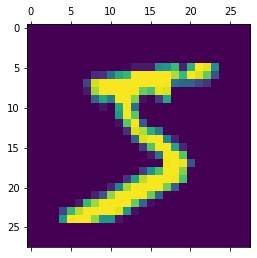

In [ ]:
plt.matshow(X_train[0]) #Seeing which number X_train[0] has

In [ ]:
Y_train[0] # Seeing what the number actually is

5

In [ ]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

**Flattening the dataset**

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)


In [ ]:
X_test_flattened.shape

(10000, 784)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Defining and training the neural network**

In [ ]:
model = keras.Sequential([
                  keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,Y_train,epochs=7)


Epoch 1/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4712 - accuracy: 0.8767
Epoch 2/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.9153
Epoch 3/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2836 - accuracy: 0.9214
Epoch 4/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9234
Epoch 5/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9256
Epoch 6/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2617 - accuracy: 0.9271
Epoch 7/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2585 - accuracy: 0.9287


**Evaluating the performance on the test data**


In [ ]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.9272


[0.2668275237083435, 0.9272000193595886]

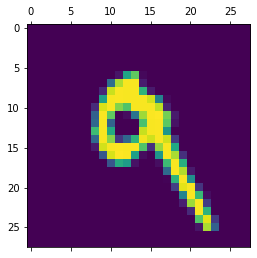

In [ ]:
plt.matshow(X_test[7])#Seeing what the first number is...

In [ ]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted[7]

array([6.9971276e-07, 2.2957632e-01, 7.8401268e-03, 1.4609754e-02,
       2.1769339e-01, 2.2417578e-01, 7.6055527e-04, 2.2536665e-02,
       7.4659318e-02, 9.7070736e-01], dtype=float32)

In [ ]:
np.argmax(Y_predicted[7])

9

In [ ]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

**Building the Confusion matrix**


In [ ]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    5,   10,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   6,   11,  921,   18,    7,    4,   14,   11,   38,    2],
       [   3,    0,   17,  925,    0,   21,    3,   13,   22,    6],
       [   1,    2,    2,    2,  921,    0,   14,    5,    9,   26],
       [  10,    2,    3,   37,    8,  763,   19,    9,   35,    6],
       [   7,    3,    4,    1,    6,    7,  927,    2,    1,    0],
       [   1,    6,   24,    5,    5,    0,    0,  962,    3,   22],
       [   8,    9,    5,   20,    8,   24,   11,   13,  870,    6],
       [  11,    7,    1,   10,   28,    6,    0,   35,    4,  907]],
      dtype=int32)>

**Confusion matrix visualization**

Text(42.0, 0.5, 'Truth')

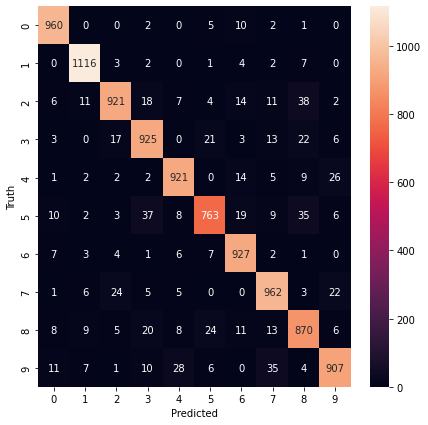

In [ ]:
import seaborn as sn
plt.figure(figsize = (7,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


**Adding a hidden layer**


In [ ]:
model = keras.Sequential([
                  keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                  keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened,Y_train,epochs=7)


Epoch 1/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2709 - accuracy: 0.9234
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1233 - accuracy: 0.9633
Epoch 3/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0852 - accuracy: 0.9739
Epoch 4/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0650 - accuracy: 0.9803
Epoch 5/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0507 - accuracy: 0.9843
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0404 - accuracy: 0.9872
Epoch 7/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0343 - accuracy: 0.9894


In [ ]:
model.evaluate(X_test_flattened,Y_test)#evaluating this new model

313/313 [==============================] - 0s 1ms/step - loss: 0.0756 - accuracy: 0.9771


[0.07559120655059814, 0.9771000146865845]

Text(42.0, 0.5, 'Truth')

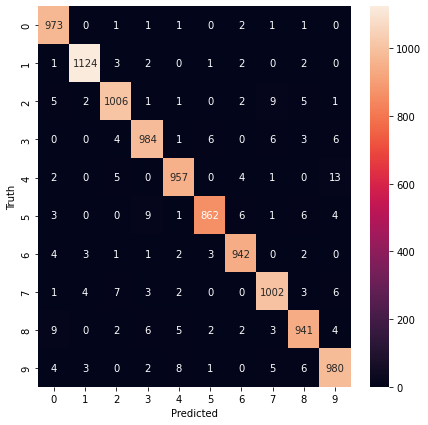

In [ ]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_predicted_labels)
plt.figure(figsize = (7,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
model = keras.Sequential([
                  keras.layers.Flatten(input_shape=(28,28)),#training the model with a built in function from keras
                  keras.layers.Dense(100,activation='relu'),
                  keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adamax',loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,Y_train,epochs=7)


Epoch 1/7
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3885 - accuracy: 0.8958
Epoch 2/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2207 - accuracy: 0.9383
Epoch 3/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1749 - accuracy: 0.9514
Epoch 4/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1457 - accuracy: 0.9592
Epoch 5/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1260 - accuracy: 0.9649
Epoch 6/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1110 - accuracy: 0.9691
Epoch 7/7
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0991 - accuracy: 0.9724
